## 4-1. 시각화 라이브러리, Seaborn

- Seaborn을 이용해서 데이터를 요약해서 보여주는 시각화를 진행해봅시다.

### Seaborn 라이브러리

`seaborn`은 matplotlib을 기반으로 하는 파이썬의 데이터 시각화 라이브러리로, 다양한 그래프를 고수준에서 그릴 수 있다.

라이브러리 다운로드 : 
> Tip: `%`를 이용해서 노트북(.ipynb) 환경에서 터미널 코드로 실행

In [ ]:
%pip install seaborn

### Seaborn Essentials

`seaborn` 은 다양한 그래프를 그릴 수 있다
실습은 자주 사용되는 꺾은선 그래프와 막대 그래프로 진행

In [2]:
# 시각화에 필요한 라이브러리를 불러와봅시다.

import seaborn as sns

### 꺾은선 그래프(Line Plot)

두 변수의 값에 따른 추이를 선으로 이은 그래프
`.lineplot()`를 이용해서 이를 그릴 수 있다.

<AxesSubplot:>

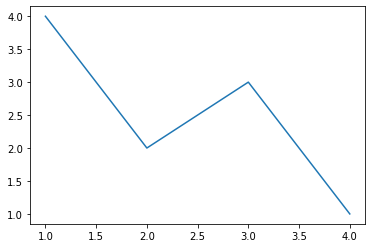

In [16]:
# Scatterplot을 직접 그려봅시다
# 값 x=[1, 3, 2, 4]
# 값 y=[0.7,0.2,0.1,0.05]

sns.lineplot(x=[1, 3, 2, 4], y=[4, 3, 2, 1])

### 막대 그래프(Bar Plot)

범주형 데이터의 "값"과 그 값의 크기를 직사각형으로 나타낸 그림 
`.bar()`를 이용해서 이를 그릴 수 있다.  

<Axes: >

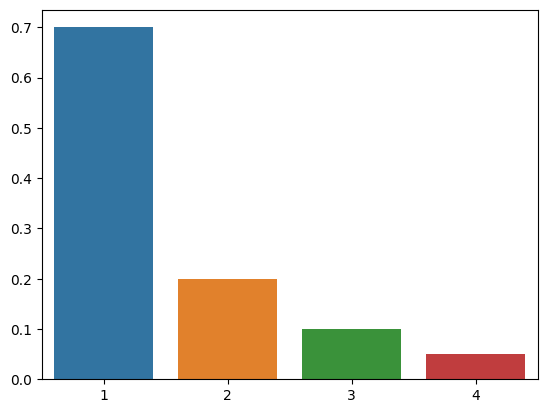

In [3]:
# Barplot을 직접 그려봅시다
# 범주 x=[1,2,3,4]
# 값 y=[0.7,0.2,0.1,0.05]

sns.barplot(x=[1,2,3,4],y=[0.7,0.2,0.1,0.05])

### Plot의 속성

`seaborn`은 파이썬의 시각화 라이브러리 `matplotlib`을 기반으로 만들어짐  
`matplotlib.pyplot`의 속성을 변경해서 그래프에 다양한 요소를 변경/추가할 수 있습니다.

In [4]:
# matplotlib.pyplot을 불러와봅시다.

import matplotlib.pyplot as plt

`plt.title()` : 그래프에 **제목** 을 추가합니다

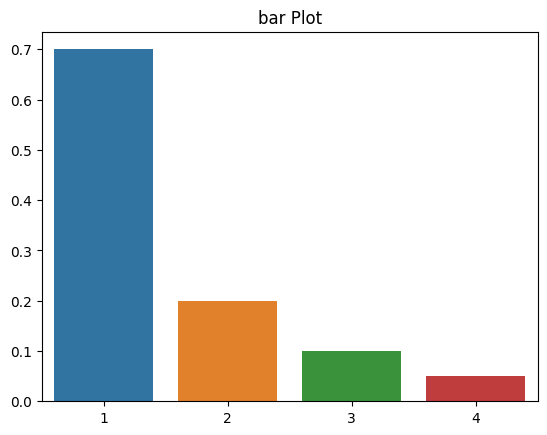

In [5]:
# 제목을 추가해봅시다.

sns.barplot(x=[1,2,3,4],y=[0.7,0.2,0.1,0.05])
plt.title("bar Plot")

plt.show()

`plt._label()` : 그래프의 축에 **설명** 을 추가합니다

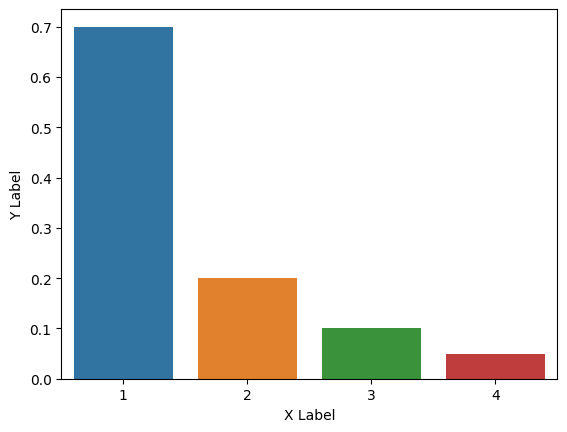

In [6]:
# xlabel과 ylabel을 추가해봅시다.
sns.barplot(x=[1,2,3,4],y=[0.7,0.2,0.1,0.05])
plt.xlabel("X Label")
plt.ylabel("Y Label")

plt.show()


`plt._lim()` : 그래프의 축의 **범위** 를 지정합니다.

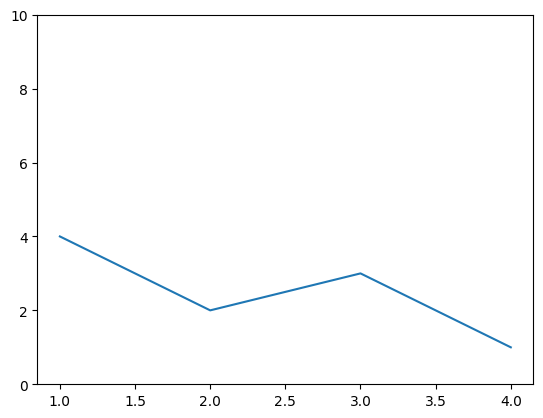

In [14]:
# lineplot에서 ylim을 2~3으로 제한해봅시다.
sns.lineplot(x=[1,3,2,4],y=[4,3,2,1])
plt.ylim(0,10)

plt.show()


`plt.figure(figsize = (x, y))` : 그래프의 **크기** 를 지정합니다.

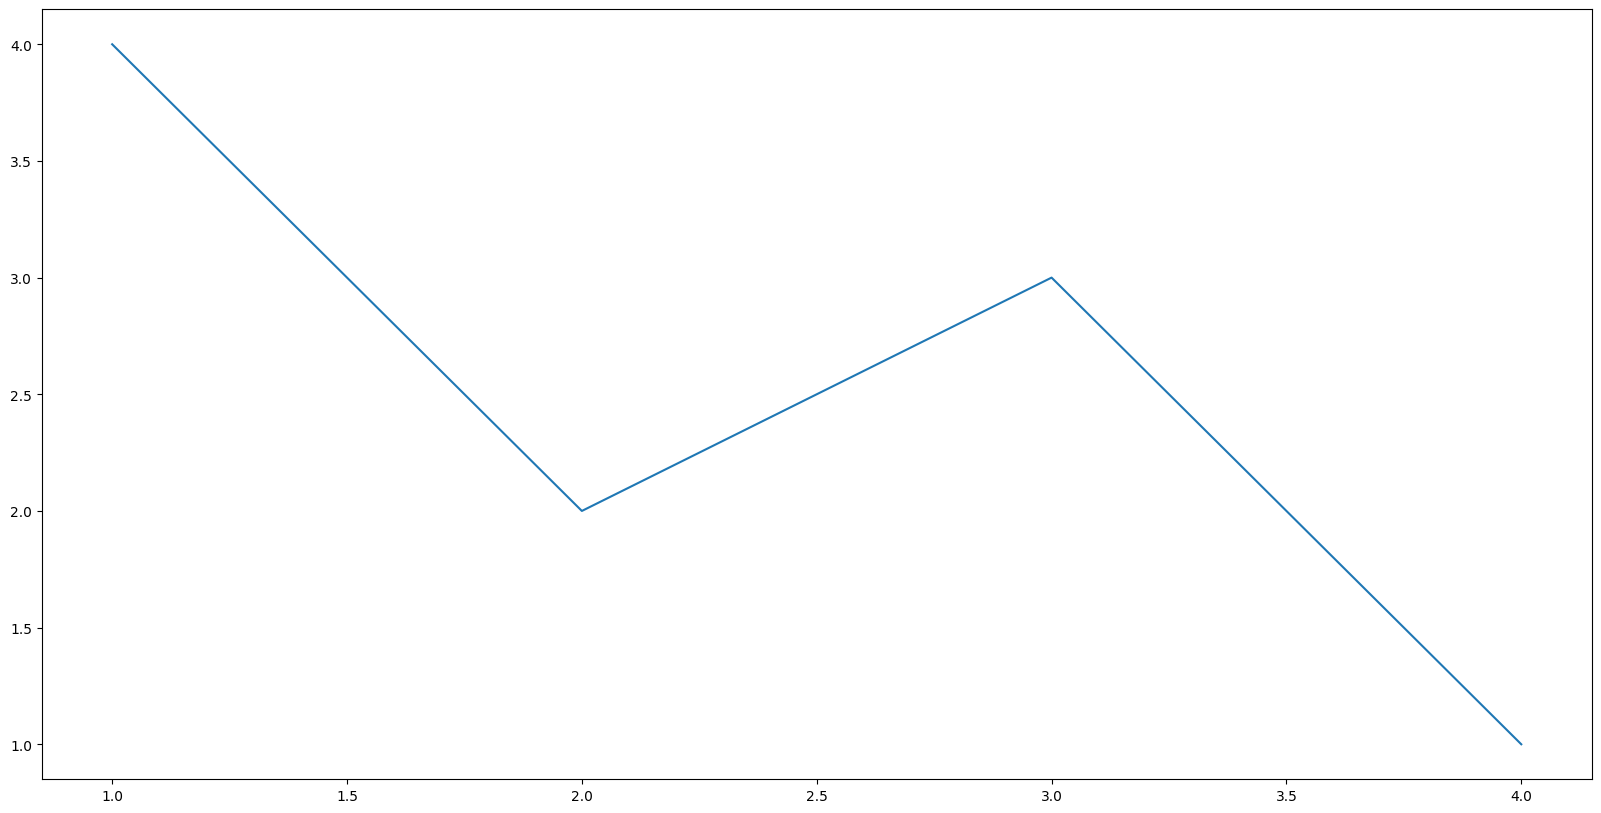

In [13]:
# 크기를 (20, 10)으로 지정해봅시다.
plt.figure(figsize=(20, 10))
sns.lineplot(x=[1,3,2,4],y=[4,3,2,1])

plt.show()

간단한 사용법을 확인했으니, 이제 이를 활용해서 스크래핑과 함께 사용해봅시다!

Tip: 이 외에도 다양한 그래프를 그릴 수 있습니다.  
[이 링크](https://seaborn.pydata.org/examples/index.html)를 통해 더 자세히 살펴보실 수 있습니다. :)

## 4-2. 스크래핑 결과 시각화하기 I - 기상청 날씨 정보 조회

- Selenium과 Seaborn을 이용해서 날씨 정보를 가져온 후 Lineplot을 그려본다.

### Target: 기상청 날씨 스크래핑하기

다음 사이트에 Selenium을 이용해서 날씨 정보를 가져오기. : https://www.weather.go.kr/w/weather/forecast/short-term.do

In [1]:
# 스크래핑에 필요한 라이브러리를 불러와봅시다.

from selenium import webdriver
from selenium.webdriver import ActionChains
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.actions.action_builder import ActionBuilder
from selenium.webdriver import Keys, ActionChains
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By

지난 실습에서 다룬 마우스 실습을 통해 로그인 창에 접속하는 것에 성공했는데요,  
여기에 이제 키보드 입력을 넣어서 로그인을 완료해봅시다.

In [4]:
# driver를 이용해 기상청 날씨 데이터를 가져와봅시다.

driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))
driver.get("https://www.weather.go.kr/w/weather/forecast/short-term.do")
driver.implicitly_wait(3)

temps = driver.find_element(By.ID, "my-tchart").text
temps = [ int(i) for i in temps.replace("℃","").split("\n")]
print(temps)

[22, 22, 21, 18, 16, 14, 14, 13, 12, 11, 11, 10, 9, 9, 8, 8, 10, 12, 14, 16, 18]


**꺾은선 그래프(Line Plot)** 을 이용해 앞으로의 기온의 추이를 나타내봅시다.


<Axes: >

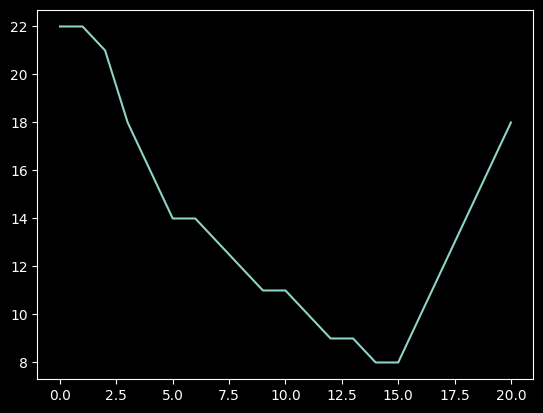

In [6]:
# 받아온 데이터를 통해 꺾은선 그래프를 그려봅시다.
# x = Elapsed Time(0~len(temperatures)
# y = temperatures
import seaborn as sns
sns.lineplot(
    x = [i for i in range(len(temps))],
    y = temps
)


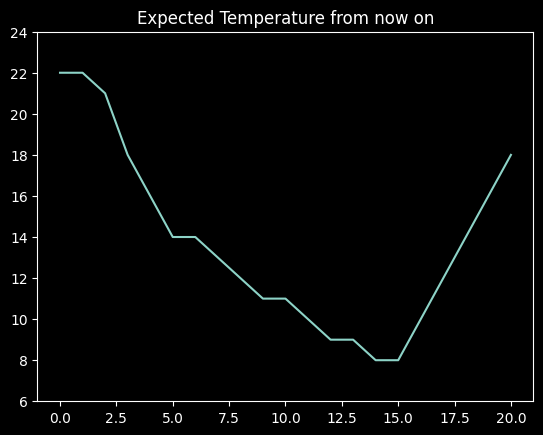

In [9]:
# 받아온 데이터를 통해 꺾은선 그래프를 그려봅시다.
import matplotlib.pyplot as plt

plt.ylim(min(temps) - 2, max(temps) + 2)
plt.title("Expected Temperature from now on")
sns.lineplot(
    x = [i for i in range(len(temps))],
    y = temps
)

plt.show()

## 4-2. 스크래핑 결과 시각화하기 I - 해시코드 질문태그 빈도 시각화

- bs4와 Seaborn을 이용해서 질문의 주제 빈도를 보여주는 시각화 진행

### Target: 해시코드 질문 태그의 빈도 확인

이전에 진행한 해시코드(https://hashcode.co.kr) 사이트에서 질문 아래 "태그"가 있다.

해당 태그의 빈도를 측정하여 어떤 주제의 질문이 많이 올라오는지 알 수 있는지 알아본다.

In [2]:
# 다음 User-Agent를 추가해봅시다.

user_agent = {"User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_4) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.97 Safari/537.36"}

In [21]:
# 필요한 라이브러리를 불러온 후, 요청을 진행해봅시다.
import time 
import requests
from bs4 import BeautifulSoup

frequency = {}

for i in range(1, 11):
    res = requests.get("https://hashcode.co.kr/?page={}".format(i), user_agent)
    soup = BeautifulSoup(res.text, "html.parser")

    ul_tags = soup.find_all("ul", "question-tags")
    for ul in ul_tags :
        li_tags = ul.find_all("li")
        for li in li_tags:
            tag = li.text.strip()
            # print(tag)
            frequency[tag] = frequency.get(tag, 0) + 1

    time.sleep(0.5)

print(frequency)

{'python': 234, 'vim': 1, 'c': 43, 'struct': 2, 'generic': 1, 'java': 44, 'deep-learning': 1, 'keyerror': 2, 'pandas': 21, 'dataframe': 10, 'android': 5, 'code': 2, 'matplotlib': 1, 'beautifulsoup': 6, 'replace': 1, 'ai': 3, 'gui': 3, 'tkinter': 4, 'software_development': 1, 'javac': 1, 'ubuntu': 3, 'vmware': 1, 'multithreading': 1, 'algorithm': 6, 'coding-test': 4, 'bfs': 1, 'react': 7, 'javascript': 16, 'arduino': 4, 'node.js': 8, 'regex': 3, 'multiprocessing': 1, 'pygame': 1, 'html': 13, 'css': 7, 'application-development': 1, 'logistic-regression': 2, 'logistic': 1, 'error': 7, 'csv': 4, 'class': 8, 'instance': 1, 'hashmap': 1, 'object': 1, 'windows': 2, 'for': 6, 'selenium-webdrive': 6, 'c++': 21, 'mfc': 1, 'win32': 1, 'django': 4, 'recursive': 4, 'flatten': 1, 'python3': 9, 'dictionary': 4, 'array': 3, 'initialization': 2, 'qt': 2, 'pdf': 1, 'hashcode': 1, 'kotlin': 4, 'private': 2, 'image': 3, 'netlify': 1, 'data': 2, 'directory': 1, 'cv2': 1, 'raspberry-pi': 2, 'dom': 1, 'async

In [22]:
# Counter를 사용해 가장 빈도가 높은 value들을 추출합니다.
from collections import Counter

counter = Counter(frequency)
counter.most_common(10)

[('python', 234),
 ('java', 44),
 ('c', 43),
 ('pandas', 21),
 ('c++', 21),
 ('javascript', 16),
 ('html', 13),
 ('dataframe', 10),
 ('python3', 9),
 ('crawling', 9)]

In [24]:
# Seaborn을 이용해 이를 Barplot으로 그립니다.
x = [ elem[0] for elem in counter.most_common(10)]
y = [ elem[1] for elem in counter.most_common(10)]

x

['python',
 'java',
 'c',
 'pandas',
 'c++',
 'javascript',
 'html',
 'dataframe',
 'python3',
 'crawling']

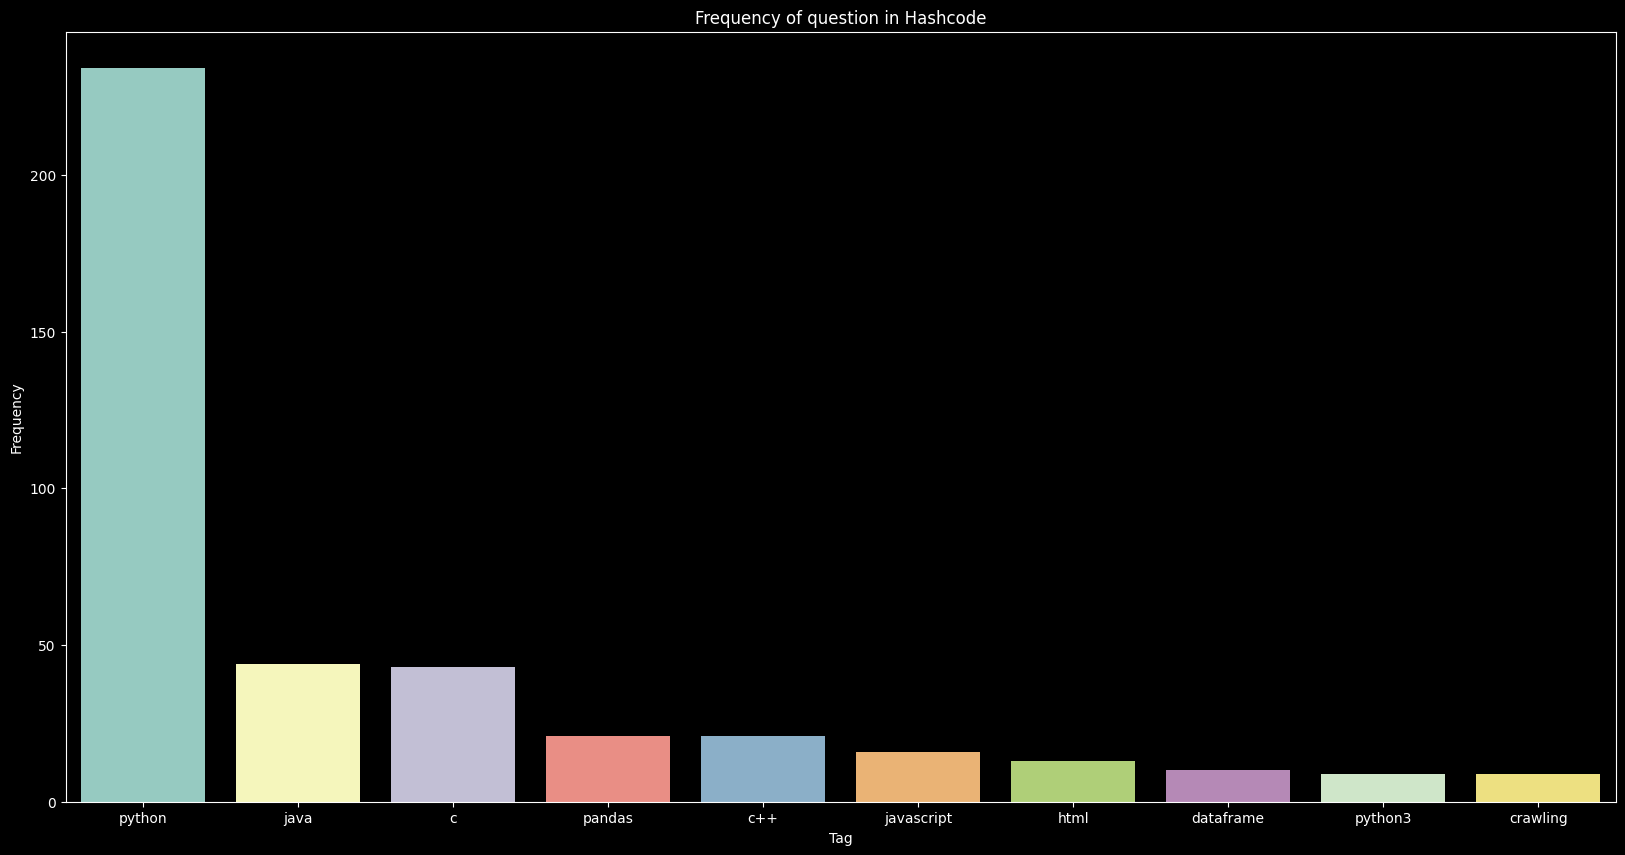

In [25]:
# figure, xlabel, ylabel, title을 적절하게 설정해서 시각화를 완성해봅시다.

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,10))
plt.title("Frequency of question in Hashcode")
plt.xlabel("Tag")
plt.ylabel("Frequency")

sns.barplot(x=x, y=y)

plt.show()


## 4-4. 뭉게뭉게 단어구름, Wordcloud

- wordcloud를 이용해 텍스트 구름을 만든다.

### wordcloud 라이브러리

`wordcloud`는 파이썬의 텍스트 클라우드 라이브러리로, 이를 기반으로 텍스트 구름을 그릴 수 있다.
`konlpy`는 한국어 형태소 분석기 라이브러리로, 주어진 문장에서 명사 등을 뽑아 내는 데에 사용할 수 있다.

`pip`으로 라이브러리 다운로드 진행


In [ ]:
%pip install wordcloud
%pip install konlpy

In [ ]:
# 텍스트 구름을 그리기 위해 필요한 라이브러리를 불러와봅시다.

# 시각화에 쓰이는 라이브러리
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# 횟수를 기반으로 딕셔너리 생성
from collections import Counter

# 문장에서 명사를 추출하는 형태소 분석 라이브러리
from konlpy.tag import Hannanum

In [ ]:


# 워드클라우드를 만드는 데 사용할 애국가 가사입니다.

national_anthem = """
동해물과 백두산이 마르고 닳도록
하느님이 보우하사 우리나라 만세
무궁화 삼천리 화려 강산
대한 사람 대한으로 길이 보전하세
남산 위에 저 소나무 철갑을 두른 듯
바람 서리 불변함은 우리 기상일세
무궁화 삼천리 화려 강산
대한 사람 대한으로 길이 보전하세
가을 하늘 공활한데 높고 구름 없이
밝은 달은 우리 가슴 일편단심일세
무궁화 삼천리 화려 강산
대한 사람 대한으로 길이 보전하세
이 기상과 이 맘으로 충성을 다하여
괴로우나 즐거우나 나라 사랑하세
무궁화 삼천리 화려 강산
대한 사람 대한으로 길이 보전하세
"""

# Hannanum 객체를 생성한 후, .nouns()를 통해 명사를 추출합니다.
from konlpy.tag import Hannanum

hannanum = Hannanum()
nouns = hannanum.nouns(national_anthem)

nouns[:10]

['동해물', '백두산', '하느님', '보우하사', '우리나라', '무궁화', '삼천리', '화', '강산', '사람']

In [ ]:
counter = Counter(nouns)
counter

Counter({'동해물': 1,
         '백두산': 1,
         '하느님': 1,
         '보우하사': 1,
         '우리나라': 1,
         '무궁화': 4,
         '삼천리': 4,
         '화': 4,
         '강산': 4,
         '사람': 4,
         '대한': 4,
         '길': 4,
         '보전하세': 4,
         '남산': 1,
         '위': 1,
         '소나무': 1,
         '철갑': 1,
         '듯': 1,
         '불변': 1,
         '우리': 2,
         '기상일세': 1,
         '하늘': 1,
         '공활한데': 1,
         '구름': 1,
         '달': 1,
         '가슴': 1,
         '일편단심일세': 1,
         '기상': 1,
         '충성': 1,
         '사랑하세': 1})

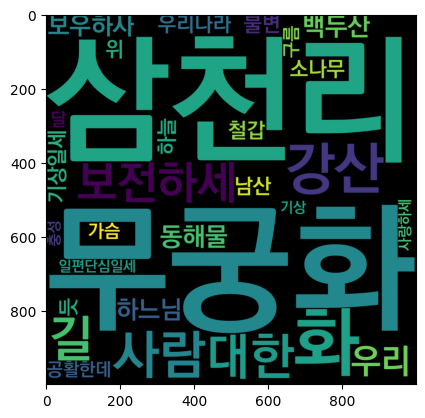

In [ ]:
wordcloud = WordCloud(
    font_path="/content/KoPubDotumBold.ttf",
    width=1000,
    height=1000,
)

img = wordcloud.generate_from_frequencies(counter)
plt.imshow(img)

## 4-5. 워드클라우드 만들기 - 해시코드 질문 키워드

- bs4와 wordcloud를 이용해서 질문 키워드를 보여주는 시각화 진행

### Target: 해시코드 질문 제목의 키워드
해시코드(https://hashcode.co.kr) 질문태그를 활용해 질문 제목을 스크래핑한 후, 형태소 분석을 진행해서 워드클라우드를 그려본다.



In [ ]:

# 다음 User-Agent를 추가해봅시다.

user_agent = {"User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_4) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.97 Safari/537.36"}


In [ ]:
# Pagination이 되어있는 질문 리스트의 제목을 모두 가져와 리스트 questions에 저장해봅시다.
# https://hashcode.co.kr/?page={i}
# 과도한 요청을 방지하기 위해 0.5초마다 요청을 보내봅시다.

import time 
import requests
from bs4 import BeautifulSoup

questions = []

for i in range(1 ,6):
  res = requests.get("https://hashcode.co.kr/?page={}".format(i), {"User-Agent": user_agent})
  soup = BeautifulSoup(res.text, "html.parser")

  parsed_datas = soup.find_all("li", "question-list-item")

  for data in parsed_datas:
    questions.append(data.h4.text.strip())

  time.sleep(0.5)

In [ ]:
questions[:10]

['scanf_s에서 입력에 자꾸 오류가 나타나는데, 어찌 해결해야 할까요?',
 'xgboost 하이퍼파라미터 질문',
 '정수를 입력받아 짝수의 합과 홀수의 합을 구하는 프로그램',
 '프로그래머스 vim 입력모드->일반모드 전환하는 방법',
 '파이썬 프로젝트 중 오류',
 '구조체 사용하여 다항식의 덧셈 구현하는 문제',
 'Fourier transform 된 사진파일의 HPF 코으',
 '다시 매개변수화되어야 하는 매개변수화된 메서드 작성',
 '파이썬 간단한 별그리기 질문',
 'Java 홀수 혹은 짝수의 합 구하는 프로그램 질문']

In [9]:
# 텍스트 구름을 그리기 위해 필요한 라이브러리를 불러와봅시다.

# 시각화에 쓰이는 라이브러리
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# 횟수를 기반으로 딕셔너리 생성
from collections import Counter

# 문장에서 명사를 추출하는 형태소 분석 라이브러리
from konlpy.tag import Hannanum

In [ ]:
# Hannanum 객체를 생성한 후, .nouns()를 통해 명사를 추출합니다.
words = []

hannanum = Hannanum()

for question in questions:
  nouns = hannanum.nouns(question)
  words += nouns

print(len(words))

1053


In [ ]:
# counter를 이용해 각 단어의 개수를 세줍니다.

counter = Counter(words)

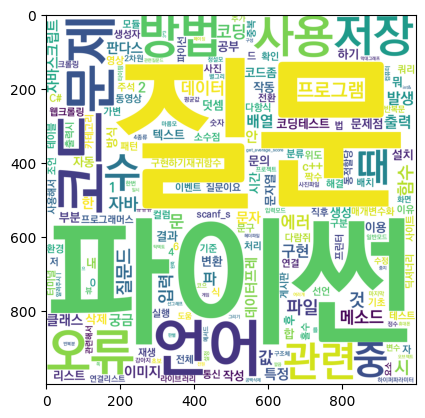

In [ ]:
# WordCloud를 이용해 텍스트 구름을 만들어봅시다.

wordcloud = WordCloud(
    font_path="/content/KoPubDotumBold.ttf",
    background_color="white",
    height=1000,
    width=1000
)

img = wordcloud.generate_from_frequencies(counter)
plt.imshow(img)